In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
import matplotlib.pyplot as plt


In [2]:
path = '/gdrive/My Drive'
trans = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))])
train_set = torchvision.datasets.MNIST(root = path, train = True, transform = trans, download=True)
test_set = torchvision.datasets.MNIST(root = path, train = False, transform = trans)

batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset = train_set, batch_size = batch_size)
test_loader = torch.utils.data.DataLoader(dataset = test_set, batch_size = batch_size)

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.size())
print(example_targets)


torch.Size([128, 1, 28, 28])
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4,
        1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2,
        5, 4, 7, 6, 7, 9, 0, 5])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
 class Net(nn.Module):
   
  def __init__(self):
    super(Net, self).__init__()
 
    self.conv1 = nn.Conv2d(1, 32, kernel_size = 5, padding = 2)
    self.conv2 = nn.Conv2d(32, 64, kernel_size = 5, padding = 2)
    self.conv2_drop = nn.Dropout2d()

    self.fc1 = nn.Linear(7*7*64, 1000)
    self.fc2 = nn.Linear(1000, 150)
    self.fc3 = nn.Linear(150, 10)

  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), kernel_size = 2, stride = 2)
    x = F.max_pool2d(F.relu(self.conv2_drop(self.conv2(x))), kernel_size = 2, stride = 2)

    x = x.view(-1, 7*7*64)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    
    return(x)


In [4]:
net = Net()

#Loss and optimizer
calc_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 0.001)

Epoch : 0 | Loss : 0.05574562294781754
Epoch : 10 | Loss : 0.01639160851178717
Epoch : 20 | Loss : 0.009543458500856703
Epoch : 30 | Loss : 0.007404328751789111
Epoch : 40 | Loss : 0.00733136053609979
Epoch : 50 | Loss : 0.006232329583800971
Epoch : 60 | Loss : 0.004252039032893121
Epoch : 70 | Loss : 0.005872088942912476
Epoch : 80 | Loss : 0.006880939677850275
Epoch : 90 | Loss : 0.00483300526147722


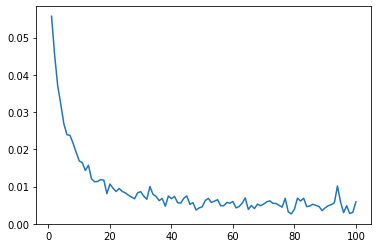

In [6]:
total_step = len(train_loader)

loss_list = []
x_list=[]
acc_list = []
num_epochs = 100

for epoch in range(num_epochs):

  loss_acc = 0
  for i, (images, labels) in enumerate(train_loader):

    optimizer.zero_grad()
    # Run the forward pass
    outputs = net(images)
    loss= calc_loss(outputs, labels)
    loss.backward()
    optimizer.step()
    loss_acc += loss.item()

    # Track the accuracy
    total = labels.size(0)
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()

    acc_list.append(correct / total)

  loss = loss_acc/(i+1)
  loss_list.append(loss)
  x_list.append(epoch+1)

  if epoch % 10 == 0:
    print("Epoch : {} | Loss : {}".format(epoch, loss))

plt.plot(x_list, loss_list)
plt.show()

In [9]:
print("Epoch : {} | Loss : {}".format(epoch, loss))
print("Train Accuracy: {}".format(acc_list[-1]*100))

Epoch : 99 | Loss : 0.005873605939532864
Train Accuracy: 100.0


In [10]:
#net.eval()
with torch.no_grad():
  correct = 0
  total = 0
  for image, label in test_loader:

    output = net(image)
    _, predict = torch.max(output.data, 1)
    total += label.size(0)
    correct += (predict == label).sum().item()

  print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))

Test Accuracy of the model on the 10000 test images: 98.87 %
